In [2]:
import os, glob
import pandas as pd
from functools import reduce

all_files = glob.glob(os.path.join("data_*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)

df2 = pd.read_csv('data_2.csv', sep=',')
df3 = pd.read_csv('data_3.csv', sep=',')
df4 = pd.read_csv('data_4.csv', sep=',')
df5 = pd.read_csv('data_5.csv', sep=',')
df6 = pd.read_csv('data_6.csv', sep=',')

df_merged = df2.merge(df3, 'outer', on = 'Xmm').sort_values(by='Xmm')
df_merged = df_merged.merge(df4, 'outer', on = 'Xmm').sort_values(by='Xmm')
df_merged = df_merged.merge(df5, 'outer', on = 'Xmm').sort_values(by='Xmm')
df_merged = df_merged.merge(df6, 'outer', on = 'Xmm').sort_values(by='Xmm')

df_merged.columns=['X(mm)','Img-2','Img-3','Img-4','Img-5','Img-6']
df_merged.to_csv( "merged.csv", index=False)
df_merged

,X(mm),Img-2,Img-3,Img-4,Img-5,Img-6
0,0,1.0,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,8.0
1,2,NaN,NaN,NaN,1.0,NaN
5,3,NaN,NaN,NaN,NaN,6.0
6,4,NaN,NaN,NaN,NaN,40.0
2,5,NaN,NaN,NaN,6.0,4.0
3,6,12.0,NaN,NaN,5.0,3.0
7,7,NaN,NaN,NaN,NaN,6.0


In [41]:
import numpy as np
df = df_merged.set_index(keys='X(mm)', drop=True).replace(np.nan,0).T
df

X(mm),0,1,2,3,4,5,6,7
Img-2,1.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
Img-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Img-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Img-5,0.0,0.0,1.0,0.0,0.0,6.0,5.0,0.0
Img-6,0.0,8.0,0.0,6.0,40.0,4.0,3.0,6.0


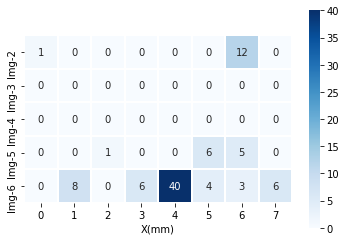

In [44]:
from matplotlib import pyplot as plt

import seaborn as sns
%matplotlib inline
#fig = plt.figure()
fig = sns.heatmap(df, annot=True, cmap='Blues', linewidth=2, square=True)
#plt.gca().invert_yaxis()